In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
data = pd.read_csv('./all_weekly_excess_deaths.csv')

In [5]:
datacopy = data.copy()

In [6]:
data.shape     # 5770 x 17

(5770, 17)

In [7]:
data.columns

Index(['country', 'region', 'region_code', 'start_date', 'end_date', 'days',
       'year', 'week', 'population', 'total_deaths', 'covid_deaths',
       'expected_deaths', 'excess_deaths', 'non_covid_deaths',
       'covid_deaths_per_100k', 'excess_deaths_per_100k',
       'excess_deaths_pct_change'],
      dtype='object')

In [8]:
data.shape     # 5768 x 15

(5770, 17)

In [9]:
deaths = data[['total_deaths', 'covid_deaths', 'expected_deaths', 'excess_deaths', 'non_covid_deaths']]
deaths.shape      # 5768 x 5
deaths = deaths.astype('int32')

In [10]:
interval = data[['days', 'year']]
interval.shape    # 5768 x 2

(5770, 2)

In [11]:
deaths.first_valid_index()
deaths['covid_death_ratio'] = deaths['total_deaths']/deaths['covid_deaths']
deaths.shape      # 5768 x 6

(5770, 6)

In [12]:
data['start_date'] = pd.to_datetime(data['start_date'])
data['end_date'] = pd.to_datetime(data['end_date'])
data['month'] = pd.DatetimeIndex(data['start_date']).month

In [13]:
month_file = data.groupby('month')[['total_deaths', 'covid_deaths', 'expected_deaths', 'excess_deaths', 'non_covid_deaths']].sum()
month_file.shape       # 12 x 5

(12, 5)

In [14]:
year_file = data.groupby('year')[['total_deaths', 'covid_deaths', 'expected_deaths', 'excess_deaths', 'non_covid_deaths']].sum()
year_file.shape        # 3 x 5

(3, 5)

In [15]:
month_file

,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths
month,,,,,
1,3814254.1,488474,3.245971e+06,568283.222294,3325780.1
2,3119717.1,367092,2.899179e+06,220538.356204,2752625.1
3,3441103.2,327925,3.150416e+06,290687.413976,3113178.2
4,3013393.3,367172,2.598328e+06,415065.090880,2646221.3
5,3066692.5,252806,2.784071e+06,282621.703701,2813886.5
6,2496349.1,161654,2.235775e+06,260574.267531,2334695.1
7,2053643.1,144799,1.758319e+06,295324.498204,1908844.1
8,2507629.8,220546,2.061507e+06,446122.841445,2287083.8
9,1965364.3,175256,1.661991e+06,303373.427418,1790108.3


In [16]:
year_file = year_file / 1000
year_file

,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths
year,,,,,
2020,13508.6628,1219.162,11697.270559,1811.392241,12289.5008
2021,13670.8969,1654.330,11496.637260,2174.259640,12016.5669
2022,5696.0215,508.319,5226.940841,469.080659,5187.7025


In [17]:
year_file['deaths_million'] = 'millions'
year_file

,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,deaths_million
year,,,,,,
2020,13508.6628,1219.162,11697.270559,1811.392241,12289.5008,millions
2021,13670.8969,1654.330,11496.637260,2174.259640,12016.5669,millions
2022,5696.0215,508.319,5226.940841,469.080659,5187.7025,millions


In [18]:
month_file['death_10k'] = 'tenThsnd'
month_file

,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,death_10k
month,,,,,,
1,3814254.1,488474,3.245971e+06,568283.222294,3325780.1,tenThsnd
2,3119717.1,367092,2.899179e+06,220538.356204,2752625.1,tenThsnd
3,3441103.2,327925,3.150416e+06,290687.413976,3113178.2,tenThsnd
4,3013393.3,367172,2.598328e+06,415065.090880,2646221.3,tenThsnd
5,3066692.5,252806,2.784071e+06,282621.703701,2813886.5,tenThsnd
6,2496349.1,161654,2.235775e+06,260574.267531,2334695.1,tenThsnd
7,2053643.1,144799,1.758319e+06,295324.498204,1908844.1,tenThsnd
8,2507629.8,220546,2.061507e+06,446122.841445,2287083.8,tenThsnd
9,1965364.3,175256,1.661991e+06,303373.427418,1790108.3,tenThsnd


In [29]:
td1 = np.array(month_file['total_deaths'])
cd1 = np.array(month_file['covid_deaths'])
td2 = np.array(year_file['total_deaths'])
cd2 = np.array(year_file['covid_deaths'])
mon = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
td1 = td1.astype('int32')
print(td1)

[3814254 3119717 3441103 3013393 3066692 2496349 2053643 2507629 1965364
 2071703 2739608 2586123]


Text(0, 0.5, 'Total Deaths')

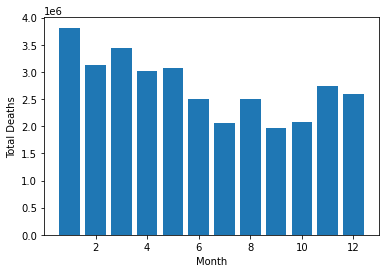

In [30]:
plt.bar(mon, td1)
plt.xlabel('Month')
plt.ylabel('Total Deaths')

Text(0, 0.5, 'Covid Deaths')

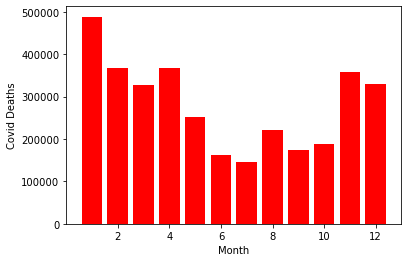

In [31]:
plt.bar(mon, cd1, color=['red'])
plt.xlabel('Month')
plt.ylabel('Covid Deaths')

In [32]:
new_month_file = month_file[['total_deaths', 'covid_deaths']]
new_month_file.shape

(12, 2)

In [33]:
new_month_file = new_month_file / 10

In [34]:
new_month_file

,total_deaths,covid_deaths
month,,
1,381425.41,48847.4
2,311971.71,36709.2
3,344110.32,32792.5
4,301339.33,36717.2
5,306669.25,25280.6
6,249634.91,16165.4
7,205364.31,14479.9
8,250762.98,22054.6
9,196536.43,17525.6


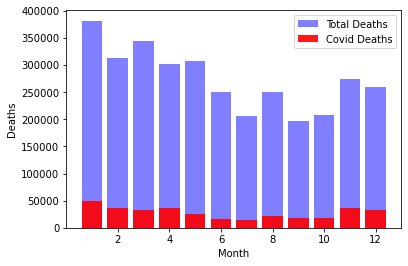

In [35]:
plt.bar(mon, new_month_file['total_deaths'], alpha=0.5, color='blue')
plt.bar(mon, new_month_file['covid_deaths'], alpha=0.9, color='red')
plt.xlabel('Month')
plt.ylabel('Deaths')
plt.legend(['Total Deaths', 'Covid Deaths'])
plt.show()

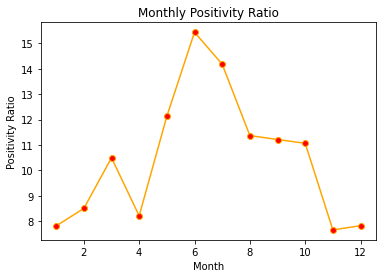

In [36]:
new_month_file['ratio'] = new_month_file['total_deaths'] / new_month_file['covid_deaths']
plt.plot(mon, new_month_file['ratio'], marker='o', markerfacecolor='red', color='orange', linestyle='solid')
plt.title('Monthly Positivity Ratio')
plt.xlabel('Month')
plt.ylabel('Positivity Ratio')
plt.show()

In [42]:
new_year_file = year_file[['total_deaths', 'covid_deaths']] / 100
new_year_file['ratio'] = new_year_file['total_deaths'] / new_year_file['covid_deaths']
new_year_file

,total_deaths,covid_deaths,ratio
year,,,
2020,135.086628,12.19162,11.080285
2021,136.708969,16.54330,8.263706
2022,56.960215,5.08319,11.205604


In [46]:
ratio1 = max(new_month_file['ratio'])
ratio2 = max(new_year_file['ratio'])
print(ratio1, ratio2)

15.442544570502431 11.20560415801888


In [64]:
deaths1 = data[['total_deaths', 'expected_deaths', 'excess_deaths']]
deaths1

,total_deaths,expected_deaths,excess_deaths
0,2926.0,2965.372893,-39.372893
1,2902.0,2956.539560,-54.539560
2,2914.0,2932.039560,-18.039560
3,3007.0,2940.372893,66.627107
4,2910.0,2900.039560,9.960440
...,...,...,...
5765,57864.0,55510.914407,2353.085593
5766,57523.0,54958.314407,2564.685593
5767,56959.0,54850.514407,2108.485593
5768,57545.0,54459.714407,3085.285593


In [ ]:
deaths1 =deaths1 /10

In [69]:
d1 = np.array(deaths1['total_deaths'])
d2 = np.array(deaths1['expected_deaths'])
d3 = np.array(deaths1['excess_deaths'])

In [67]:
d2.shape

(5770,)

In [68]:
d4 = d2/d1
d5 = d3/d1
d4.shape

(5770,)

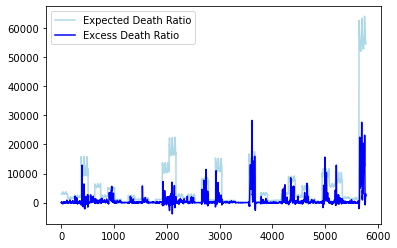

In [73]:
plt.plot(d2, color='lightblue', linestyle='solid')
plt.plot(d3, color='blue', linestyle='solid')
plt.legend(['Expected Death Ratio', 'Excess Death Ratio'])

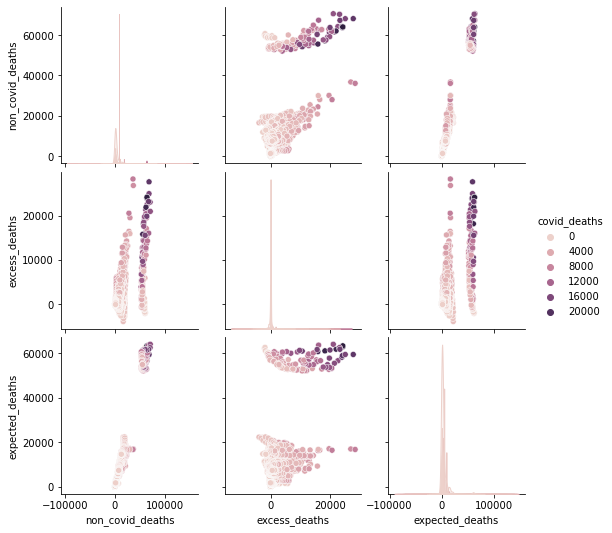

In [82]:
a1 = data[['covid_deaths', 'non_covid_deaths', 'excess_deaths', 'expected_deaths']]
sn.pairplot(a1, hue='covid_deaths')